#  שער

<div dir=rtl>

1.   עירוני ד
<div dir="rtl">
<table>
  <tr>
    <td>
      <img src="../../shared/pics/school_logo.jpeg" width="100" />
    </td>
    <td>
      <p>
        <b>עירוני ד׳ תל-אביב</b>
      </p>
    </td>
  </tr>
</table>
</div>
2.   שם התלמיד:
3.   ת"ז:
4.   שם המחקר: אישור הלוואות
4.   שנת לימודים: 2024
5.   שם המורה: איתי בארלי

</div>



# נושא המחקר

<div dir="rtl">

מטרת מחקר זה היא יצירת אלגוריתם החוזה על סמך נתונים הנוגעים לחיי היום יום האם הלוואה בסכום ידוע תאושר בבנק.<br>
האלגוריתם מסתמך על נתונים כמו סכום ההלוואה, חלוקה להחזרים, הכנסה מוקדמת ועוד.</div>

<img src="pics/illustration.png" />

## סיפור המסגרת

<div dir="rtl">פרויקט זה נכתב במסגרת סיפור רקע. תחרות שבה יש שני תפקידים: מנהל תחרות ומתחרה. מנהל התחרות בוחר את הטבלה ומטפל בה טיפול ראשוני (בדיקה כי עמודת המטרה אינה עם ערכים חסרים, בדיקה כי אין שורות משוכפלות או ריקות) ואז מפצל אותה לשני חלקים, אימון ובדיקה כלומר train ו-test.
<br>
המתחרה שזה למעשה אני, מקבל רק את חלק האימון train, ואין לו גישה ל-test האלגוריתם וכל חקר הנתונים מתבצע על ה-train.
<br>
לכן יכולות להעלות בעיות overfitting מכיוון שאין גישה בזמן אימון האלגוריתם לטבלת ה-test. מנהל התחרות משתמש במודל המאומן על מנת לסווג את שורות טבלת ה-test ולהשוות את התחזיות לסיווגי האמת, חלק החיזוי בפרויקט זה.
</div>

# תיאור הנתונים

## תיאור מאגר הנתונים






<div dir="rtl">
מאגר נתונים זה הוא אוסף של דוגמאות פיננסיות המשמש לקביעת זכאותם של יחידים או ארגונים לקבלת הלוואות מבנק.
</div>

## מקור הנתונים


<div dir=rtl>
מאגר נתונים זה נלקח מהאתר kaggle ונכתב על ידי ארכיט שארמה. עודכן לאחרונה לפני עשרה חודשים.  לא הצלחתי למצוא מידע נוסף. יש סיכוי שנתוני הטבלה מומצאים.</div>

## קישור למאגר הנתונים


<div dir=rtl>

[קישור](https://www.kaggle.com/datasets/architsharma01/loan-approval-prediction-dataset/data)

## פירוט על סוגי הנתונים במאגר


<div dir="rtl">
במאגר זה 4269 שורות ו-13 עמודות.<br>
3 עמודות קטגוריאליות, ו-10 מספריות.</div>

<div dir="rtl">
תיאור העמודות:

1.   loan_id: מספר הדוגמה (מספרי)

2.   no_of_dependents: מספר האנשים התלויים במבקש ההלוואה. מספרי בדיד, טווח ערכים 0 עד 5.
3.   education: האם מבקש ההלוואה בעל השכלה. קטגוריאלי, אמת או שקר.
4.   self_employed: האם מבקש ההלוואה מועסק. קטגוריאלי, אמת או שקר.
5.   income_amount: הכנסה שנתית של מבקש ההלוואה. נומרי, טווח ערכים יפורט בהמשך.
6.   loan_amount: סכום ההלוואה. נומרי, טווח ערכים יפורט בהמשך.
7.   loan_term: תקופת ההלוואה בשנים. מספרי בדיד, מכיוון שטווח הערכים לא רחב ויש מספר סופי ולא גדול באופן יחסי של ערכים בטבלה. יפורט בהמשך.
8.   cibil_score: דירוג האשראי של מבקש ההלוואה. מספרי, טווח ערכים 300 עד 900.
9.   residential_assents_value: שווי נכסי המגורים של מבקש ההלוואה. נומרי, טווח ערכים יפורט בהמשך.
10.  commercial_assets_value: שווי נכסים מסחריים של מבקש ההלוואה. נומרי טווח ערכים יפורט בהמשך.
11.  luxury_assets_value: שווי נכסי המותרות של מבקש ההלוואה. נומרי, טווח ערכים יפורט בהמשך.
12.  bank_asset_value: שווי נכסי מבקש ההלוואה בבנק. נומרי טווח ערכים יפורט בהמשך.
13.  loan_status: האם ההלוואה בדוגמה זו אושרה. קטגוריאלי, אמת או שקר.
אתייחס לעמודת זו כעמודת המטרה על ידי סיווג להלוואה שאושרה, ושלא אושרה.
</div>

# חקר נתונים

## טעינת נתונים ותצוגה של הנתונים מהמאגר



### יבוא ספריות נדרשות

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
#יבוא ספריות נדרשות
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, OneHotEncoder, StandardScaler, LabelEncoder
from feature_engine.outliers import Winsorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import sklearn as lrn
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, \
                            make_scorer, accuracy_score, f1_score, recall_score
from os import path

In [3]:
import sys
sys.path.append('../../')

from shared.code import helpers

### הצגת הטבלה

In [4]:
df = pd.read_csv('data/static/dataset.csv')
#טעינת נתונים

In [5]:
df
#הצגת הנתונים

loan_id   no_of_dependents      education  self_employed   income_annum  \
0           1                  2       Graduate             No        9600000   
1           2                  0   Not Graduate            Yes        4100000   
2           3                  3       Graduate             No        9100000   
3           4                  3       Graduate             No        8200000   
4           5                  5   Not Graduate            Yes        9800000   
...       ...                ...            ...            ...            ...   
4264     4265                  5       Graduate            Yes        1000000   
4265     4266                  0   Not Graduate            Yes        3300000   
4266     4267                  2   Not Graduate             No        6500000   
4267     4268                  1   Not Graduate             No        4100000   
4268     4269                  1       Graduate             No        9200000   

       loan_amount   loan_term   cibil_score   residential_assets_value  \
0         29900000          12           778                    2400000   
1         12200000           8           417                    2700000   
2         29700000          20           506                    7100000   
3         30700000           8           467                   18200000   
4         24200000          20           382                   12400000   
...            ...         ...           ...                        ...   
4264       2300000          12           317                    2800000   
4265      11300000          20           559                    4200000   
4266      23900000          18           457                    1200000   
4267      12800000           8           780                    8200000   
4268      29700000          10           607                   17800000   

       commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                     17600000              22700000            8000000   
1                      2200000               8800000            3300000   
2                      4500000              33300000           12800000   
3                      3300000              23300000            7900000   
4                      8200000              29400000            5000000   
...                        ...                   ...                ...   
4264                    500000               3300000             800000   
4265                   2900000              11000000            1900000   
4266                  12400000              18100000            7300000   
4267                    700000              14100000            5800000   
4268                  11800000              35700000           12000000   

      loan_status  
0        Approved  
1        Rejected  
2        Rejected  
3        Rejected  
4        Rejected  
...           ...  
4264     Rejected  
4265     Approved  
4266     Rejected  
4267     Approved  
4268     Approved  

[4269 rows x 13 columns]

In [6]:
df.drop(['loan_id'], axis = 1, inplace = True)
# מחיקת עמודת האינדקסים באישור המורה

In [7]:
df[' loan_status'].isna().sum()
# בדיקה האם יש ערכים חסרים בעמודת המטרה

np.int64(0)

<div dir="rtl">ניתן לראות כי אין ערכים חסרים (מסוג NAN) בעמודת המטרה, הפלט הינו 0.
מכיוון שיכולים להיות ערכים חריגים המסמלים ערכים חסרים יש להמשיך את הבדיקה.
</div>


In [8]:
df[' loan_status'].unique()
#בדיקה האם יש ערכים נוספים חוץ מאלו הצפויים בעמודת המטרה

array([' Approved', ' Rejected'], dtype=object)

<div dir="rtl"> מכיוון שבעמודת המטרה אין ערכים חסרים והערכים הקיימים הם כמצופה לפי ערכי העמודה אפצל את הטבלה לטבלת train ו-test.</div>

<div dir="rtl">אפצל את הטבלה כולה לעמודת המטרה ושאר הטבלה, כלומר עמודת המטרה תהיה loan_status.</div>

In [9]:
X = df.drop(' loan_status', axis=1, inplace=False)
y = df[' loan_status']

In [10]:
all_na_idx = X[X.isna().all(axis=1)].index
# זיהוי ושמירת אינדקס השורות שבהן כל הערכים חסרים

In [11]:
X.drop(all_na_idx)
# מחיקת כל השורות שבהן כל הערכים חסרים

no_of_dependents      education self_employed  income_annum  \
0                    2       Graduate            No       9600000   
1                    0   Not Graduate           Yes       4100000   
2                    3       Graduate            No       9100000   
3                    3       Graduate            No       8200000   
4                    5   Not Graduate           Yes       9800000   
...                ...            ...           ...           ...   
4264                 5       Graduate           Yes       1000000   
4265                 0   Not Graduate           Yes       3300000   
4266                 2   Not Graduate            No       6500000   
4267                 1   Not Graduate            No       4100000   
4268                 1       Graduate            No       9200000   

      loan_amount  loan_term  cibil_score  residential_assets_value  \
0        29900000         12          778                   2400000   
1        12200000          8          417                   2700000   
2        29700000         20          506                   7100000   
3        30700000          8          467                  18200000   
4        24200000         20          382                  12400000   
...           ...        ...          ...                       ...   
4264      2300000         12          317                   2800000   
4265     11300000         20          559                   4200000   
4266     23900000         18          457                   1200000   
4267     12800000          8          780                   8200000   
4268     29700000         10          607                  17800000   

      commercial_assets_value  luxury_assets_value  bank_asset_value  
0                    17600000             22700000           8000000  
1                     2200000              8800000           3300000  
2                     4500000             33300000          12800000  
3                     3300000             23300000           7900000  
4                     8200000             29400000           5000000  
...                       ...                  ...               ...  
4264                   500000              3300000            800000  
4265                  2900000             11000000           1900000  
4266                 12400000             18100000           7300000  
4267                   700000             14100000           5800000  
4268                 11800000             35700000          12000000  

[4269 rows x 11 columns]

In [12]:
y.drop(all_na_idx)
# מחיקת רשומות בעמודת המטרה ששורותיהן נמחקו כי היו ריקות

0        Approved
1        Rejected
2        Rejected
3        Rejected
4        Rejected
          ...    
4264     Rejected
4265     Approved
4266     Rejected
4267     Approved
4268     Approved
Name:  loan_status, Length: 4269, dtype: object

<div dir="rtl">
כעת אחרי שכל השורות הריקות נמחקו, אבדוק האם יש שורות משוכפלות.

</div>

In [13]:
X.duplicated().sum()

np.int64(0)

<div dir="rtl">ניתן לראות כי יש 0 שורות משוכפלות בטבלה, כלומר אין שורות משוכפלות בטבלה.</div>

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, stratify=y)

<div dir="rtl">כעת יש טבלת train וטבלת test, את כל חקר הנתונים אבצע על עותק של טבלת  ה-train</div>

## הצגת נתונים על המאגר



 <div dir="rtl">על ידי הפקודה info ניתן לראות כמה ערכים לא ריקים יש בכל עמודה. בנוסף מצוין לכל עמודה סוג הערך שמופיע בה, על ידי נתון זה אסיק ואתיחס לאופי העמודה כלומר קטגוריאלי, או מספרי. </div>

In [15]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3415 entries, 1224 to 3222
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0    no_of_dependents          3415 non-null   int64 
 1    education                 3415 non-null   object
 2    self_employed             3415 non-null   object
 3    income_annum              3415 non-null   int64 
 4    loan_amount               3415 non-null   int64 
 5    loan_term                 3415 non-null   int64 
 6    cibil_score               3415 non-null   int64 
 7    residential_assets_value  3415 non-null   int64 
 8    commercial_assets_value   3415 non-null   int64 
 9    luxury_assets_value       3415 non-null   int64 
 10   bank_asset_value          3415 non-null   int64 
dtypes: int64(9), object(2)
memory usage: 320.2+ KB


<div dir="rtl">ניתן לראות כי בכל העמודות יש מספר זהה של ערכים לא חסרים, וזהו גם מספר האינדקסים ב-X.train. למרות עובדה זו בהמשך אבדוק האם מסומנים ערכים חריגים כחסרים.</div>

In [16]:
X_train.isna().sum()
#בדיקה האם יש ערכים חסרים בטבלה

no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
dtype: int64

<div dir="rtl">ניתן לראות כי אין ערכים ריקים. אבדוק את סדרת הערכים בכל עמודה קטגוריאלית ואוודא כי אין ערכים המוגדרים כריקים.</div>

## מציאת ערכים חסרים המסומנים בערכים חריגים

<div dir="rtl">בתאים הבאים אבדוק את סדרת הערכים עבור עמודות בדידות, ואת טווח הערכים עבור עמודות רציפות. עבור העמודות הבדידות אצפה לסדרת ערכי לא גדולה ביחס לשאר סדרות הערכים.</div>

In [17]:
sorted(X_train[' no_of_dependents'].unique())

[np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5)]

<div dir="rtl">העמודה no_of_dependents
היא עבור מספר האנשים שתלויים במבקש הלוואה, ניתן לראות כי סדרת הערכים הגיונית, מ-0 אנשים עד ל-5 אנשים.</div>

In [18]:
sorted(X_train[' education'].unique())

[' Graduate', ' Not Graduate']

<div dir="rtl">העמודה education מראה האם מבקש הלוואה בעל השכלה, מכיוון שמבקש הלוואה הוא מעל גיל 18 אסיק כי עמודה זו מתייחסת ללימודים גבוהים כלומר אוניברסיטה, ניתן לראות כי יש שני ערכים בעמודה זו ושניהם הגיוניים.</div>

In [19]:
sorted(X_train[' self_employed'].unique())

[' No', ' Yes']

<div dir="rtl">העמודה self_employed מראה האם מבקש ההלוואה של אותה רשימה מועסק או לא. יש שני ערכים בסדרת הערכים ושניהם הגיוניים.</div>

In [20]:
X_train[' income_annum'].min(), X_train[' income_annum'].max()

(np.int64(200000), np.int64(9900000))

<div dir="rtl">העמודה income_annum היא עבור ההכנסה השנתית של מבקש ההלוואה. הערכים נראים הגיוניים, אין הכנסה שלילית או הכנסה נמוכה עד ללא הגיונית, אך הערכים גבוהים לכן אכתוב בהמשך על סמך שאר העמודות את המטבע בו הטבלה משתמשת.</div>

In [21]:
X_train[' loan_amount'].min(), X_train[' loan_amount'].max()

(np.int64(300000), np.int64(39500000))

<div dir="rtl">העמודה loan_amount היא עבור סכום ההלוואה המבוקש. הערכים נראים הגיוניים, אין הלוואה שלילית, אך הערכים גבוהים לכן אכתוב בהמשך על סמך שאר העמודות את המטבע בו הטבלה משתמשת.</div>

In [22]:
sorted(X_train[' loan_term'].unique())

[np.int64(2),
 np.int64(4),
 np.int64(6),
 np.int64(8),
 np.int64(10),
 np.int64(12),
 np.int64(14),
 np.int64(16),
 np.int64(18),
 np.int64(20)]

<div dir="rtl">העמודה loan_term מסמלת את החזר ההלוואה בשנים, כלומר תוך כמה זמן מבקש ההלוואה יוכל להחזיר את ההלוואה במלואה. ניתן לראות כי סדרת הערכים הגיונית.</div>

In [23]:
X_train[' cibil_score'].min(), X_train[' cibil_score'].max()

(np.int64(300), np.int64(900))

<div dir="rtl">cibil_score הינו דירוג האשראי של מבקש ההלוואה, טווח ידוע של ערך זה הוא 300-900. עמודה זו מתנהגת כצפוי.</div>

In [24]:
X_train[' residential_assets_value'].min(), X_train[' residential_assets_value'].max()

(np.int64(-100000), np.int64(28700000))

<div dir="rtl">העמודה residential_assets_value מראה את ערך נכסי המגורים של מבקש ההלוואה. ערכים שליליים הם הגיוניים מכיוון שיכול להיות מצב בו מבקש ההלוואה משכן את נכסיו, או עוד משלם משכנתא עליהם. לכן ערכים אלו הגיוניים.</div>

In [25]:
X_train[' commercial_assets_value'].min(), X_train[' commercial_assets_value'].max()

(np.int64(0), np.int64(19400000))

<div dir="rtl">בטבלה זו כפי שכתבתי בהתחלה, יש רשומות פרטיות של משקי בית ושל עסקים מסחריים. העמודה commercial_assets_value מראה את שווי הנכסים המסחריים של מבקש ההלוואה. מכיוון שיש גם אנשים פרטיים ללא עסקים מסחריים הערכים הגיוניים.</div>

In [26]:
X_train[' luxury_assets_value'].min(), X_train[' luxury_assets_value'].max()

(np.int64(300000), np.int64(39200000))

<div dir="rtl">העמודה luxury_assets_value היא עבור נכסי המותרות של מבקש ההלוואה, הערכים הגיוניים.</div>

In [27]:
X_train[' bank_asset_value'].min(), X_train[' bank_asset_value'].max()

(np.int64(0), np.int64(14700000))

<div dir="rtl">העמודה bank_asset_value
 מראה את שווי נכסי מבקש ההלוואה בבנק, כדוגמת פקודנות וחסכונות. הערכים הגיוניים, לאדם פרטי צעיר יכולים לא להיות חסכונות כלל ולכן הערך 0 הגיוני.</div>

<div dir="rtl">לסיכום נראה כי כל העמודות עם ערכים הגיוניים וצפויים. בנוסך מכיוון שערכי העמודות הנומריות גבוהים במיוחד, ויוצר הטבלה הוא מהודו אסיק כי הטבלה עובדת לפי מטבע רופי מהודו. נכון ל-15.06.2024 דולר אחד שווה ל-83.55 רופי.</div>

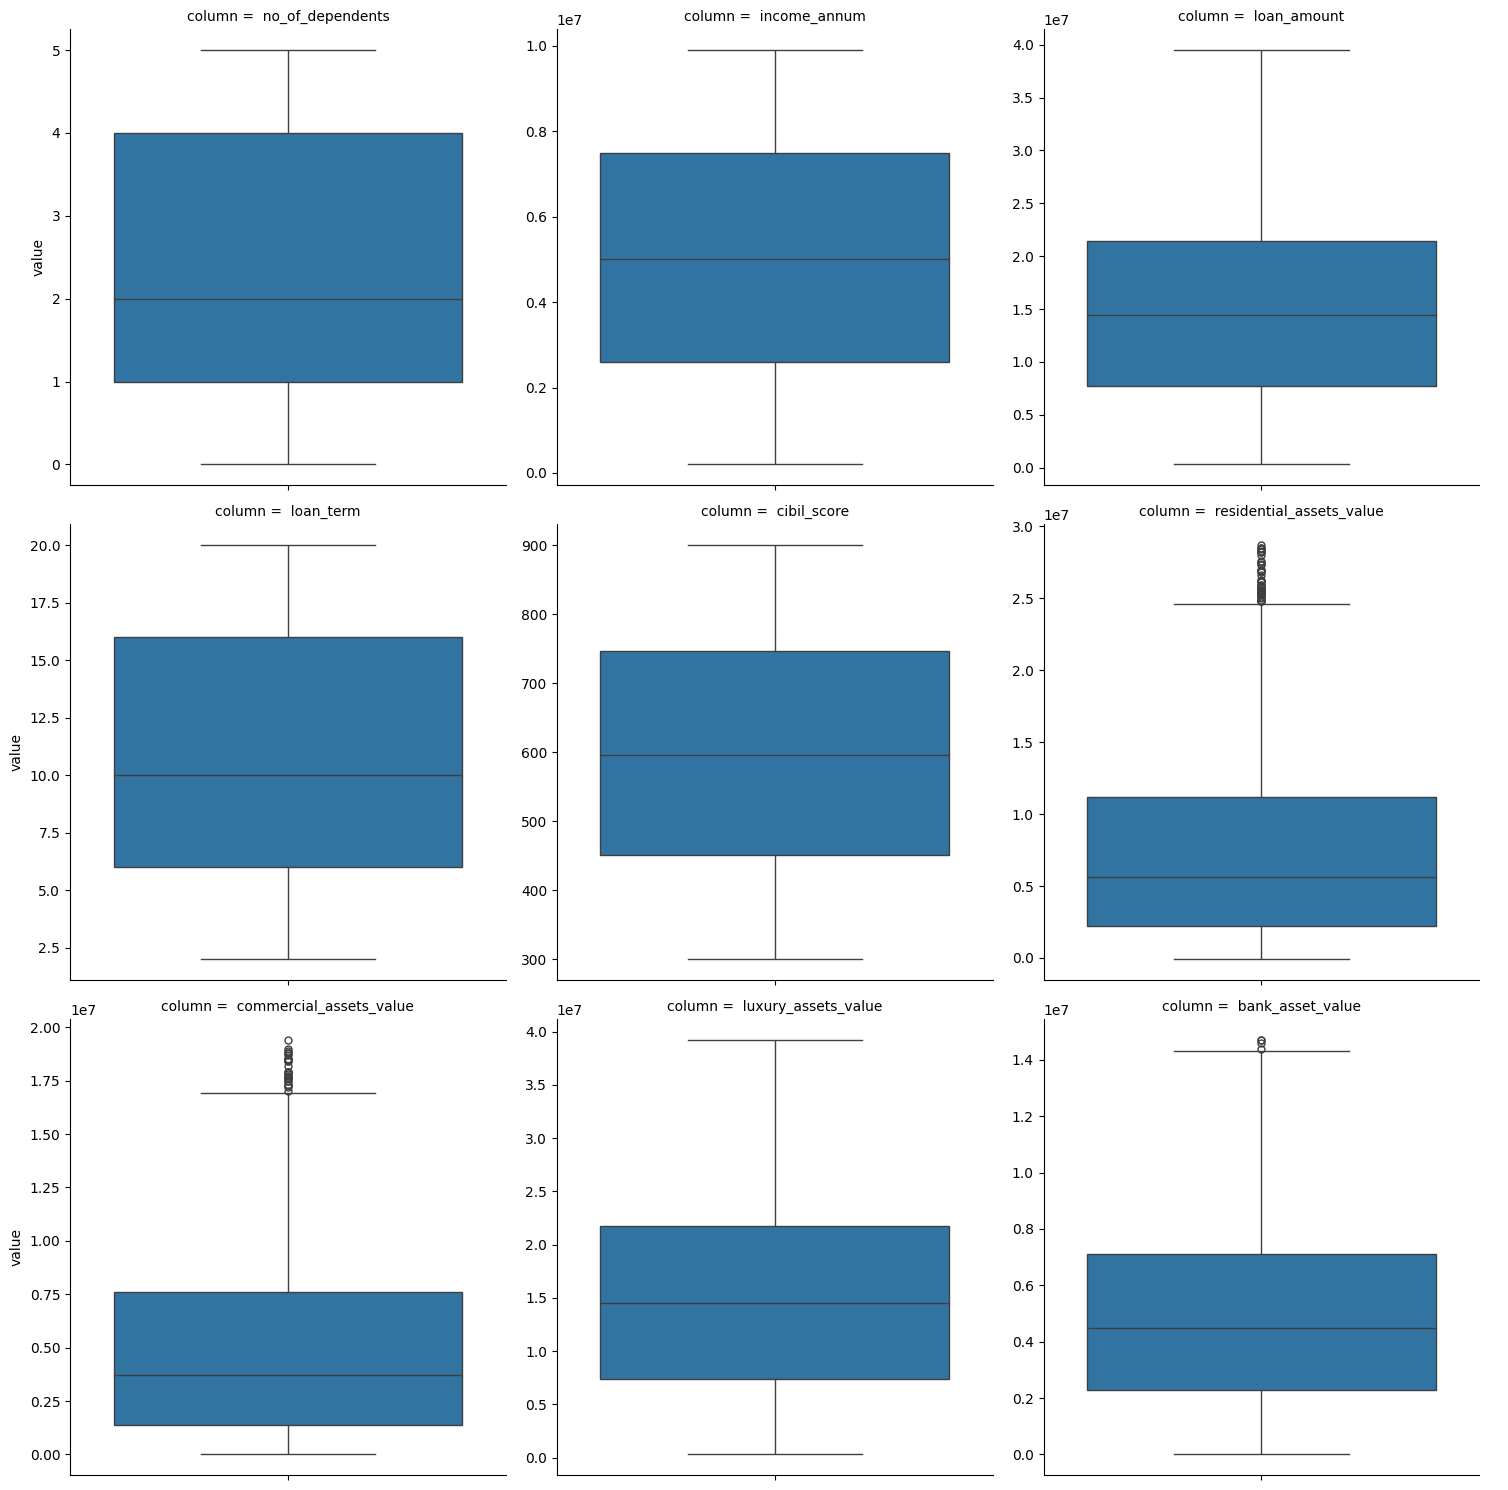

In [28]:
X_train_num_mlt = X_train.drop([' education', ' self_employed'], axis = 1).melt(var_name='column',
                                                                                value_name='value',
                                                                                ignore_index=True)
sns.catplot(kind='box',
            data = X_train_num_mlt,
            col = 'column',
            y = 'value',
            sharey = False,
            col_wrap = 3);

<div dir="rtl">ניתן לראות כי לפי catplot של sns יש ערכים חריגים בעמודות הנומריות בטבלה זו. </div>

## תיאור הנתונים



In [29]:
X_train.describe()

no_of_dependents  income_annum   loan_amount    loan_term  cibil_score  \
count       3415.000000  3.415000e+03  3.415000e+03  3415.000000  3415.000000   
mean           2.480234  5.040410e+06  1.505145e+07    10.861493   598.215227   
std            1.702579  2.798597e+06  8.997539e+06     5.715719   172.673472   
min            0.000000  2.000000e+05  3.000000e+05     2.000000   300.000000   
25%            1.000000  2.600000e+06  7.700000e+06     6.000000   451.000000   
50%            2.000000  5.000000e+06  1.440000e+07    10.000000   596.000000   
75%            4.000000  7.500000e+06  2.140000e+07    16.000000   747.000000   
max            5.000000  9.900000e+06  3.950000e+07    20.000000   900.000000   

       residential_assets_value  commercial_assets_value  luxury_assets_value  \
count              3.415000e+03             3.415000e+03         3.415000e+03   
mean               7.416574e+06             4.958799e+06         1.510182e+07   
std                6.446053e+06             4.345481e+06         9.102226e+06   
min               -1.000000e+05             0.000000e+00         3.000000e+05   
25%                2.200000e+06             1.400000e+06         7.400000e+06   
50%                5.600000e+06             3.700000e+06         1.450000e+07   
75%                1.120000e+07             7.600000e+06         2.170000e+07   
max                2.870000e+07             1.940000e+07         3.920000e+07   

       bank_asset_value  
count      3.415000e+03  
mean       4.946764e+06  
std        3.237725e+06  
min        0.000000e+00  
25%        2.300000e+06  
50%        4.500000e+06  
75%        7.100000e+06  
max        1.470000e+07

<div dir="rtl">

מסקנות בנוגע לאופי הנתונים:


1.   במאגר זה אין ערכים חסרים.

2.   מספר האנשים התלויים במבקש ההלוואה בממוצע הוא 2 אנשים (עיגלתי ערך לא שלם כלפי מטה) כלומר בממוצע מבקשי ההלוואה הם בעלי משפחה קטנה.

3. כפי שכתבתי קודם כשחיפשתי אחר ערכים חריגים המטבע שאיתו עובדים בטבלה הוא רופי, זה מסתדר עם הערכים הגבוהים שרואים בתיאור הנתונים. למשל שההכנסה הממוצעת היא 5 מיליון רופי .

4. ממוצעי ההכנסה השנתית והנכסים גבוהים, אך יש גם ערכים מינימליים נמוכים, מה שמצביע על הבדלים כלכליים גדולים בין מבקשי ההלוואה.

5. ציון האשראי הממוצע הוא כ-598, שזה קרוב לחצי מהטווח האפשרי, מה שמרמז על מצב אשראי מגוון בין הלקוחות.



</div>



## groupby פקודות



In [30]:
X_train.groupby(by= [y_train])[[' loan_amount']].agg(['max', 'mean'])

loan_amount              
                     max          mean
 loan_status                          
Approved        39500000  1.522339e+07
Rejected        38200000  1.476822e+07

<div dir="rtl">בפקודת groupby זו פיצלתי את נתוני טבלת train לפי ערכי העמודה loan_status ובכל שורה לפי העמודה loan_status הראיתי את סכום ההלוואה הגבוה ביותר, ואת סכום ההלוואה הממוצע. ניתן לראות כי הממוצע די דומה וגם הסכום המקסימלי. כלומר לפי סכום ההלוואה בלבד לא ניתן לקבוע האם ההלוואה תאושר או לא.   </div>

In [31]:
X_train.groupby(by = [' education'])[[' loan_amount']].agg(['mean', 'min', 'max'])

loan_amount                  
                      mean     min       max
 education                                  
Graduate      1.512756e+07  300000  39500000
Not Graduate  1.497457e+07  300000  38700000

<div dir="rtl">בפקודת groupby זו חילקתי את נתוני הטבלה לפי העמודה education צפיתי כי יהיו הבדלים בממוצע של סכום הלוואות כלומר שחינוך מבקש הלוואה או אי-החינוך ישפיעו על סכום הלוואה. ניתן לראות כי אין הבדל גדול בין סכום הלוואה הממוצע, וגם בטווח הנוצר לפי הערכים המקסימליים והמינימליים. תוצאה זו הפתיעה אותי, מכיוון שבמידה ומכניסים עמודה זו לטבלה ציפיתי שתהיה לה מידה של השפעה על סכום הלוואה או על אופי של מבקש ההלוואה.</div>

In [32]:
X_train.groupby(by = [' no_of_dependents'])[[' loan_amount']].agg(['mean', 'median']).sort_values(by=(' loan_amount', 'mean'), ascending=True)

loan_amount            
                           mean      median
 no_of_dependents                          
4                  1.450017e+07  13550000.0
5                  1.477978e+07  14000000.0
0                  1.493447e+07  14500000.0
1                  1.496076e+07  13900000.0
2                  1.510807e+07  14650000.0
3                  1.604025e+07  15900000.0

<div dir="rtl">בפקודת groupby זו חילקתי את הטבלה train לפי מספר האנשים שתלויים במבקש ההלוואה.  על ידי כך חשבתי לראות האם יש קשר בין מספר האנשים שתלויים במבקש ההלוואה אל מול סכום ההלוואה. ניתן לראות כי אין מגמה קבועה, וכי סכום ההלוואה הממוצע הגבוה ביותר הוא עבור 4 אנשים. ואילו הנמוך ביותר הוא עבור 3.  </div>

## הצגה ויזואלית  



### הצגה ויזואלית 1

<Figure size 1000x800 with 0 Axes>

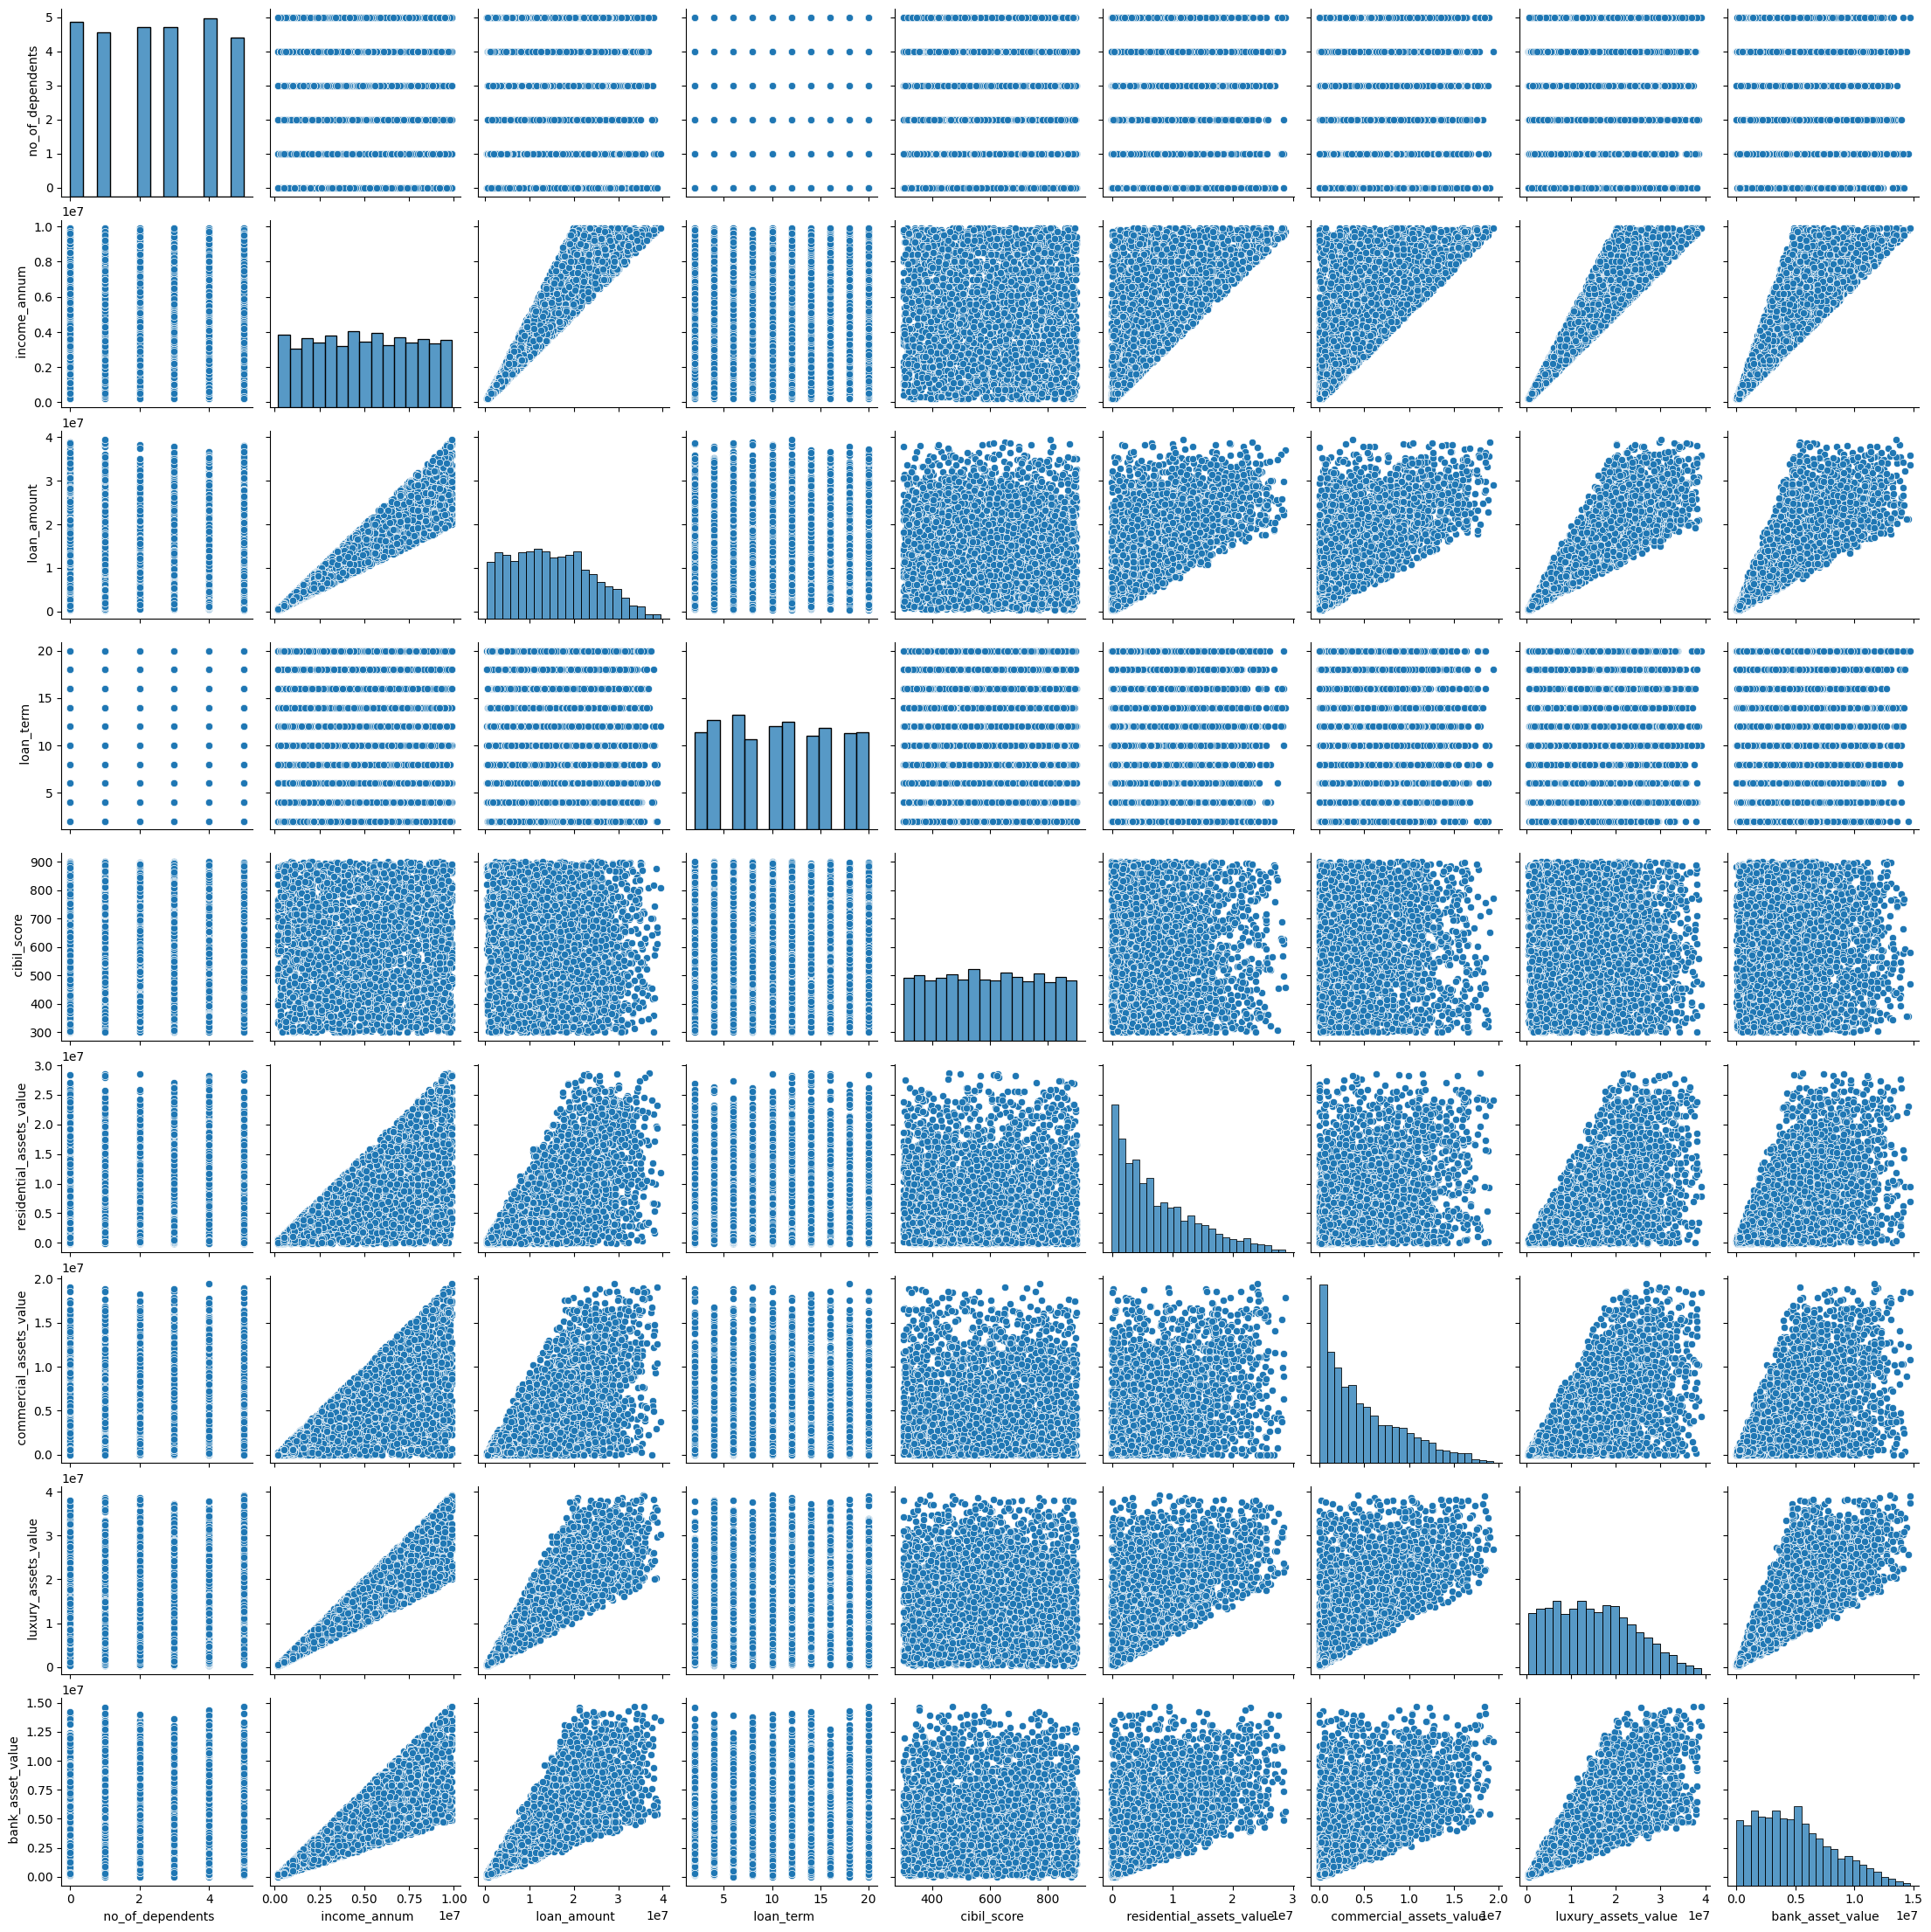

In [33]:
plt.figure(figsize= (10, 8))
plt.suptitle('Pair Plot of Loan Approval Dataset')
sns.pairplot(X_train);

<div dir="rtl"> על ידי הפונקציה pairplot ניתן ליצור טבלת ענק המצליבה את כל העמודות המספריות בטבלה train על ידי כמה סוגי גרפים שונים. על ידי טבלת ענק זו ניתן לזהות מגמות שלפיהן איצור את הגרפים הבאים. </div>

### הצגה ויזואלית 2

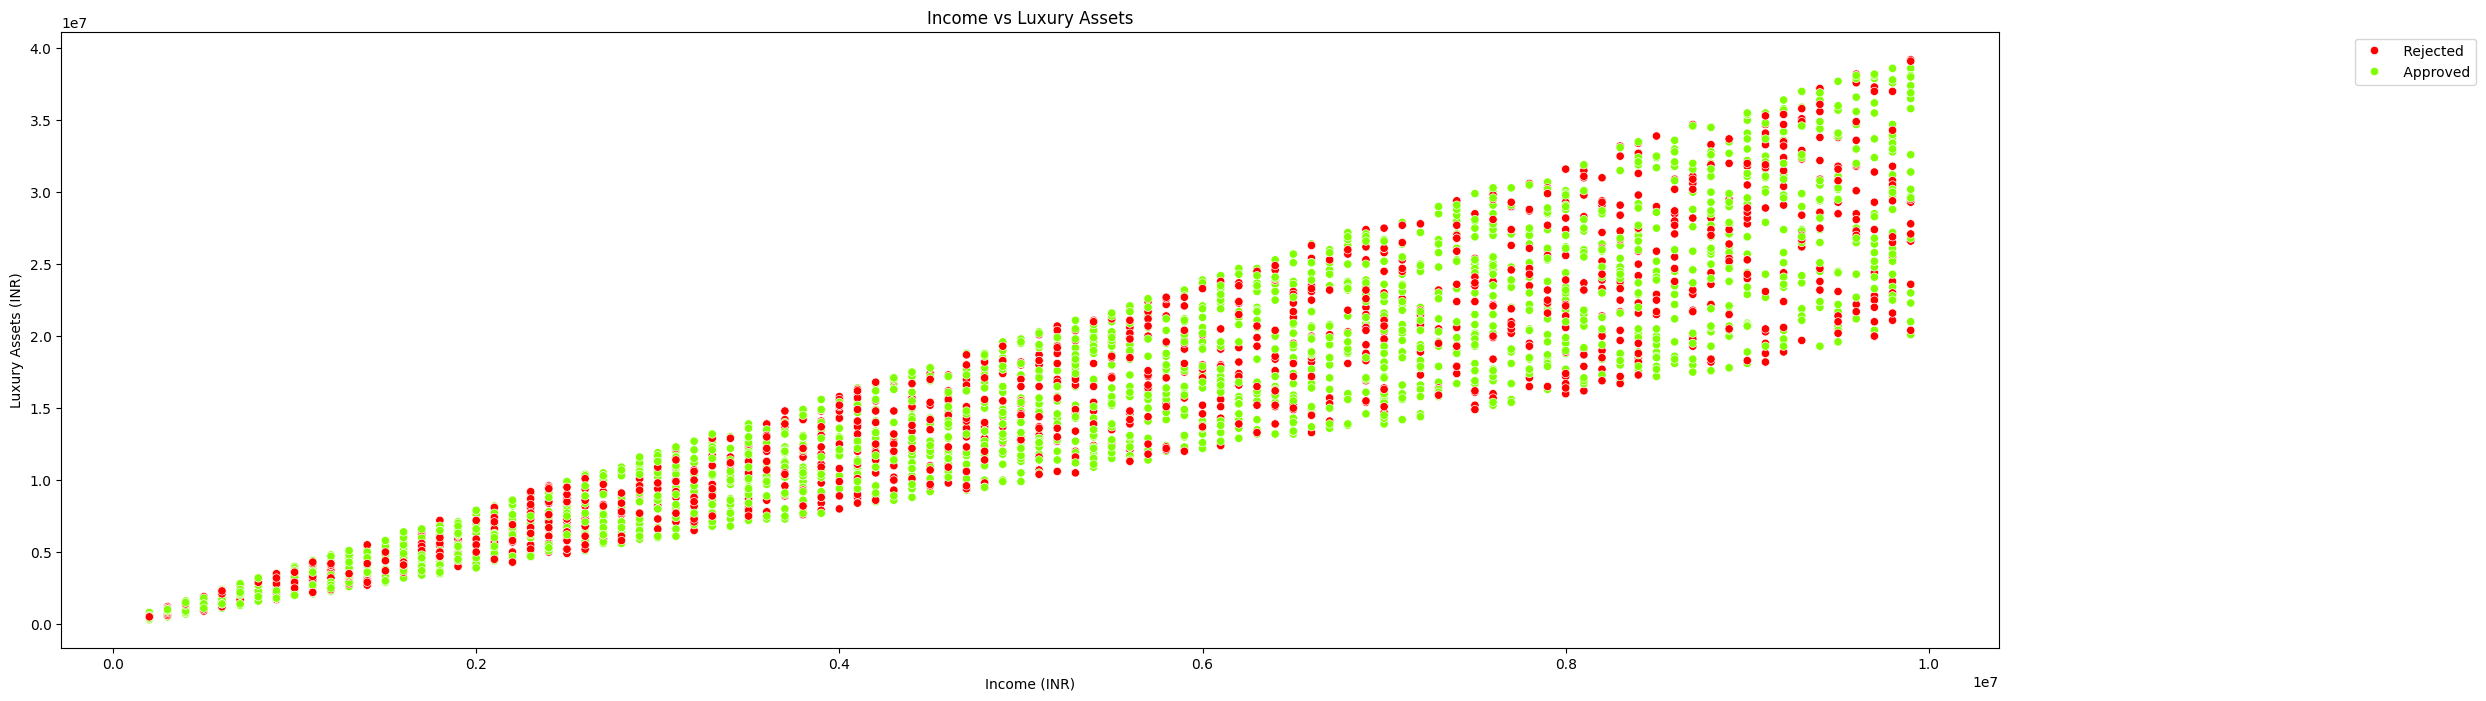

In [34]:
plt.figure(figsize= (25, 8))
sns.scatterplot(data = X_train, x = ' income_annum', y = ' luxury_assets_value', hue = y_train ,palette=[ 'red', '#7FFF00'])
plt.title('Income vs Luxury Assets')
plt.xlabel('Income (INR)')
plt.ylabel('Luxury Assets (INR)')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1));


<div dir="rtl"> בגרף זה הצגתי תלות שווי נכסי המותרות במשכורת השנתית. ניתן לראות כי יש מגמה די ברורה בין שווי נכסי המותרות וההכנסה השנתית, כלומר ככל שהכנסה השנתית עולה כך גם שווי נכסי המותרות.
<br> בהקשר למחקר זה "צבעתי" את הדוגמאות שההלוואה אושרה עבורן ואלו שלא. <br>ניתן לראות כי אין הפרדה ברורה בין ההלוואות המאושרות לבין אלו שלא על הגרף. גרף זה די מפתיע רותי מכיוון שציפיתי לראות הפרדה יותר ברורה בנוגע להכנסה השנתית, כלומר סכום מסוים שממנו ומטה לא מתקבלות יותר הלוואות.
בנוסף אציין כי למרות שהגדרתי את העמודה income_annum כנומרית, יש תחומים בציר ה-x ללא ערכים, כלומר יש סדרת ערכים עבור עמודה זו ולא בטוח שהיא נומרית.</div>

### הצגה ויזואלית 3

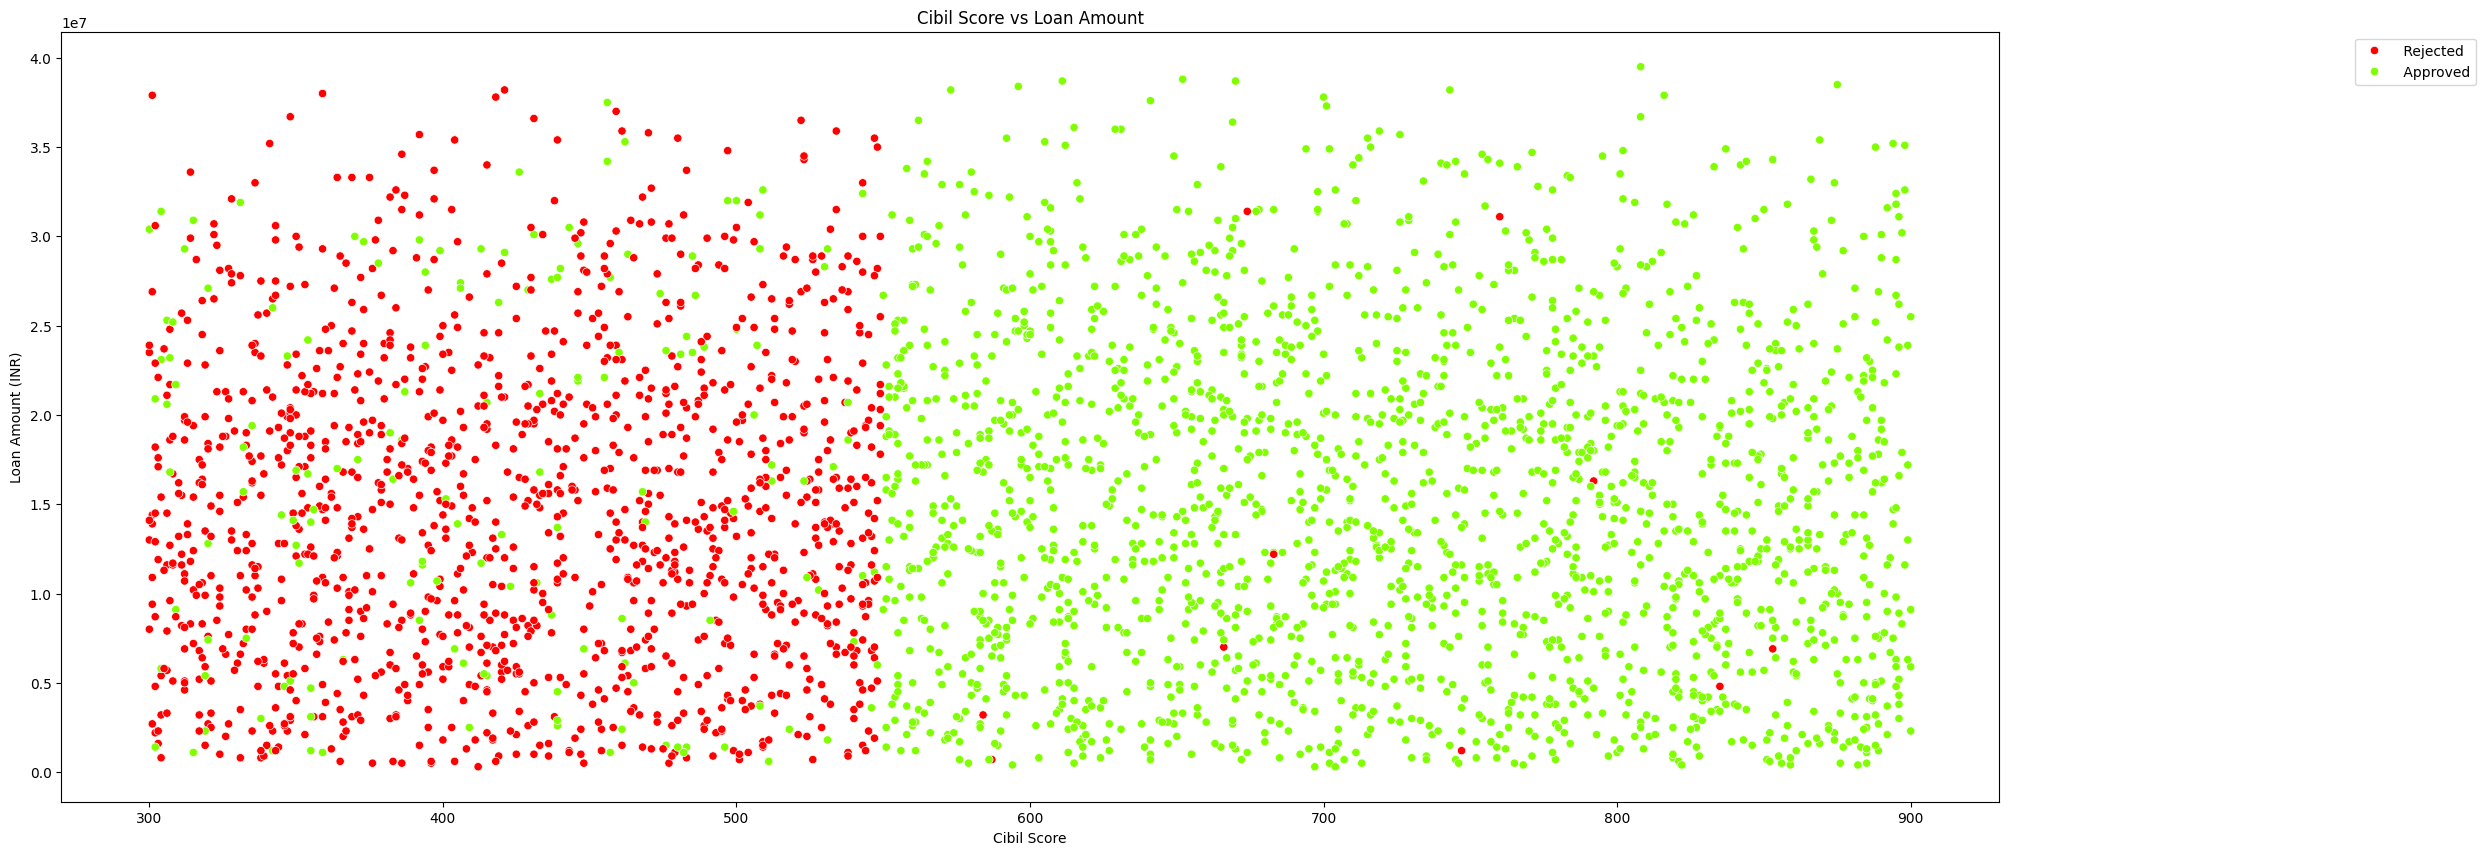

In [35]:
plt.figure(figsize= (25, 10))
sns.scatterplot(data = X_train, x = ' cibil_score', y = ' loan_amount', hue = y_train, palette=['red', '#7FFF00'])
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.title('Cibil Score vs Loan Amount')
plt.xlabel('Cibil Score')
plt.ylabel('Loan Amount (INR)');

<div dir="rtl"> בגרף למעלה הצגתי את תלות סכום ההלוואה בדירוג האשראי. ניתן לראות כי כמעט כל הגרף עם דוגמאות כלומר אין תלות אלא אי תלות. בנוסף "צבעתי" את ההלוואות המואושרות בירוק ואלו שלא באדום. ניתן לראות כי יש כמעט חלוקה לשניים בגרף, מימין עם דירוג אשראי גבוה יותר כמעט וכל ההלוואות מאושרות ללא תלות בסכום ההלוואה. ואילו משמאל באזור עם דירוג אשראי נמוך יותר מרבית ההלוואות אינן מאושרות ללא תלות בסכום ההלוואה. ניתן להסיק כי דירוג האשראי הינו אלמנט משפיע על אישור ההלוואה ויש לרצות להימצות בחלק הירוק.</div>

### הצגה ויזואלית 4

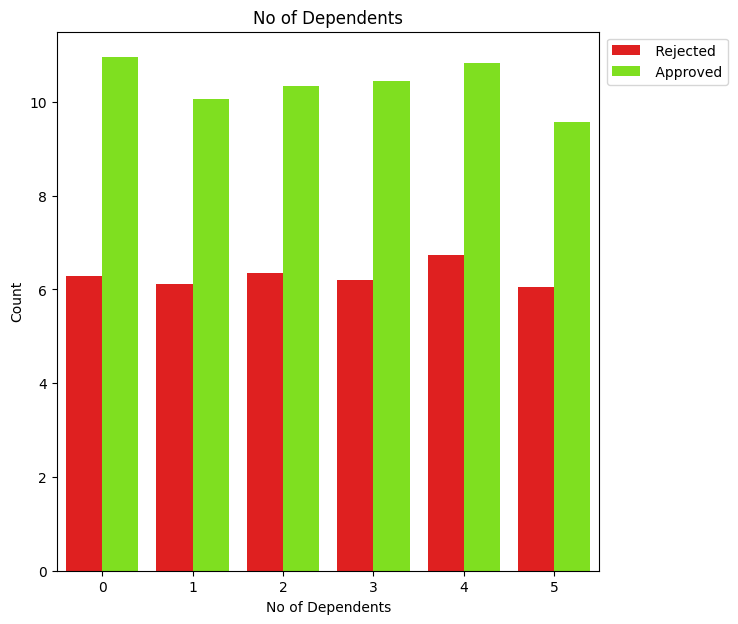

In [36]:
plt.figure(figsize= (7, 7))
sns.countplot(x = X_train[' no_of_dependents'], hue = y_train, palette=['red', '#7FFF00'], stat='percent')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.title('No of Dependents')
plt.xlabel('No of Dependents')
plt.ylabel('Count');


<div dir="rtl"> no_of_dependents הינה העמודה המציגה את מספר האנשים התלויים במבקש ההלוואה. גרף זה מציג את כמות הרשומות לכל קטגוריה, ניתן לראות כי הספירה מביאה לתוצאה דומה בין כל מספר אנשים. בנוסף, על ידי הפרמטר hue ו-multiple הראיתי את כמות ההלוואות שאושרו ושנדחו. ניתן לראות כי בכל קטגוריה כמות ההלוואות שאושרו גדולה בהרבה מן ההלוואות שלא אושרו. ניתן להסיק כי יש העדפה גורפת לאישור הלוואות.</div>

### הצגה ויזואלית 5

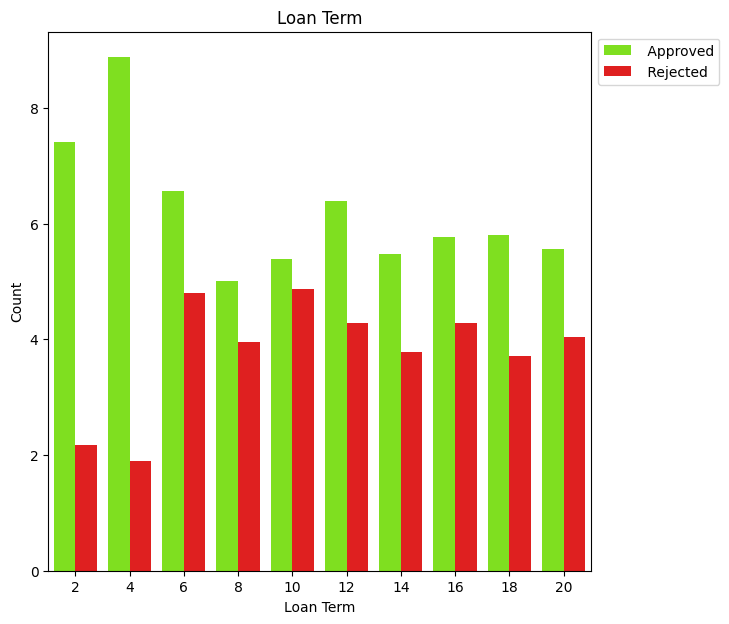

In [37]:
plt.figure(figsize= (7, 7))
sns.countplot(data = X_train, x = ' loan_term', hue = y_train, palette=['#7FFF00', 'red'], stat='percent')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.title('Loan Term')
plt.xlabel('Loan Term')
plt.ylabel('Count');

<div dir="rtl">העמודה loan_term מציגה את אורך החזר ההלוואה המבוקשת בשנים. בגרף זה הצגתי ספירה עבור כל אופצית החזר. ניתן לראות כי מהחזר של 8 שנים יש די קביעות בנוגע לכמות ההלוואות. על ידי הפרמטר multiple צבעתי את ההלוואות שאושרו ואלו שלא בכל ערך של העמודה. בשני הערכים הקטנים ביותר שנתיים וארבע שנים, מספר ההלוואות שלא אושרו קטן בהרבה מאלו שכן. ניתן לראות שבערכים גבוהים יותר המסמלים החזר לאורך יותר שנים היחס בין הלוואות שאושרו ואלו שלא קטן, בהשוואה לערכים נמוכים יותר של החזר. כלומר הבנק יעדיף לאשר הלוואות עם אורך החזר נמוך יותר.</div>

### הצגה ויזואלית 6

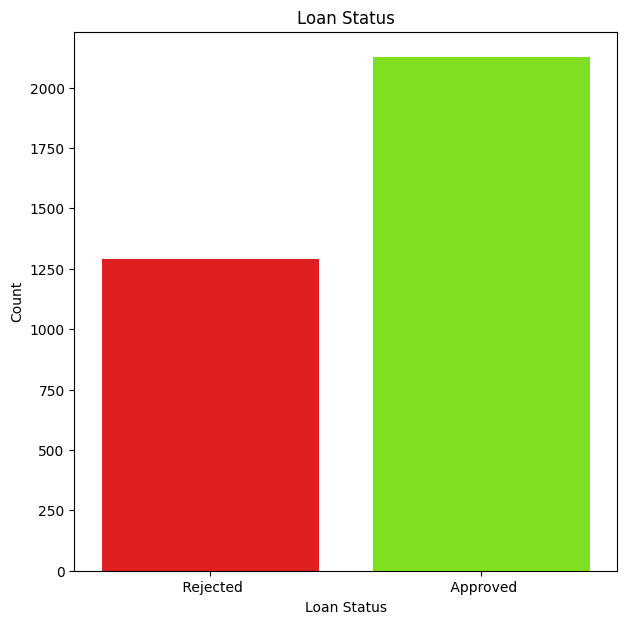

In [38]:
plt.figure(figsize= (7, 7))
sns.countplot(x = y_train, palette=['red', '#7FFF00'])
plt.title('Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count');

<div dir="rtl">גרף זה מציג את כמות ההלוואות שאושרו מול אלו שלא, ניתן לראות כי כמות ההלוואות שאושרו גדולה משמעותית ביחס לאלו שלא. גרף זה מאשש את טענותי כי יש העדפה לאישור הלוואה. בנוסף על סמך גרף זה ניתן לראות כי אין lable בעמודת המטרה עם הרבה פחות ערכים, כלומר יש איזון יחסי.</div>

## <span dir="rtl">הצגת הקורלציה</span>

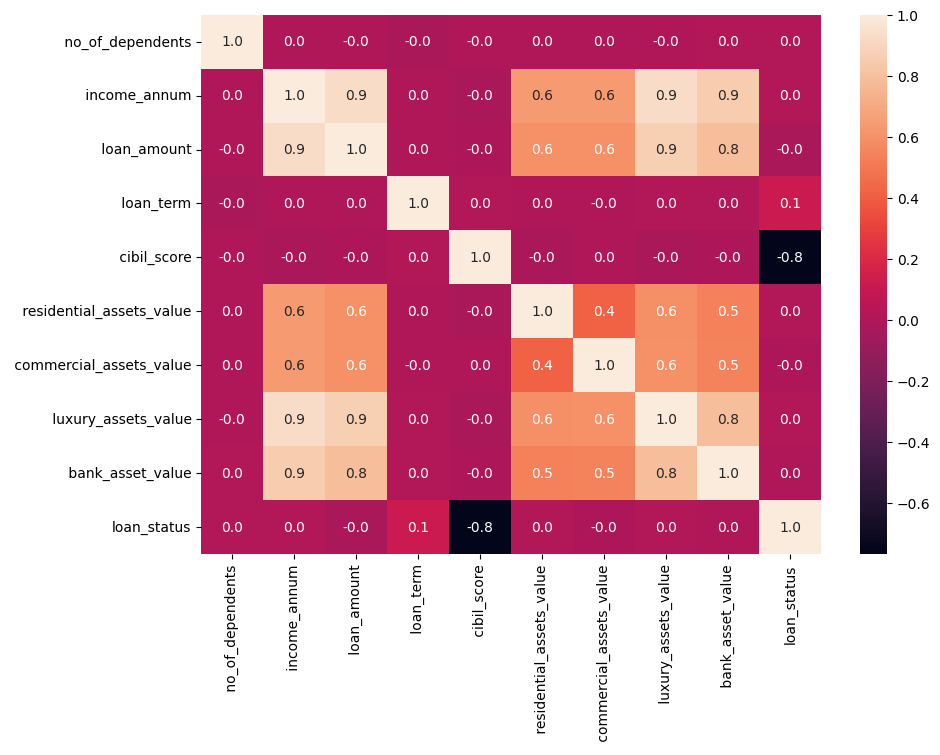

In [39]:
target_encoder = LabelEncoder()
y_train_num = pd.Series(data = target_encoder.fit_transform(y_train), #יצירת עותק עם ערכים מספריים עבור עמודת המטרה
                        name = 'loan_status',
                        index = y_train.index)
target_categorical = target_encoder.classes_
Xy_train_for_corr = pd.concat([X_train.drop([' education', ' self_employed'],
                                            axis = 1), y_train_num], axis=1) #הוצאת עמודות קטגוריאלית מטבלת האימון לצורך הקורלציה

plt.figure(figsize= (10, 7))
sns.heatmap(Xy_train_for_corr.corr(), annot=True, fmt='.1f');

<div dir="rtl">לפי המקרא בצד ימין ככל שהצבע בהיר יותר כך יש קורלציה חיובית, וככל שהצבע כהה יותר כך יש קורלציה שלילית חזקה יותר.
<br>
אני מופתע כי אין קורלציה בין no_of_dependents לבין אף אחת מהעמודות, מכיוון שהנחתי שלמספר האנשים שתלויים בכך יש משמעות על הוצאות נוספות ולכן על האפשרות להחזיר את ההלוואה. כלומר האםצ יש סיכוי שהבנק יאשר את ההלוואה.
<br>
ישנה קורלציה שלילית בין cibil_score ובין loan_status עמודת המטרה, אני מניח שעובדה זו נובעת מהאופי המספרי של שתי העמודות מכיוון שבהצגה הויזואלית הראיתי כי יש ממש קו שחוצה את ערכי ה-cibil_score בנוגע לאישור ההלוואה או לא.
<br>
אני מופתע כי אין קורלציה חזקה בין self_employed או education לבין loan_status, הנחתי כי אם הבנק צריך את הנתון הזה יש לו משמעות בנוגע לאישור ההלוואה.</div>

# עיבוד נתונים

In [40]:
lrn.set_config(transform_output = 'pandas')

### זיהוי ערכים חסרים

<div dir="rtl">לפי "חקר נתונים.תיאור" ניתן לראות כי אין ערכים חסרים בטבלה. אבל יתכנו ערכים חסרים בטבלת ה-test
 לכן אוסיף חלק זה לעיבוד הנתונים.</div>

### זיהוי ערכים חריגים

 <div dir="rtl">הערכים אמנם מסומנים כחריגים בגרף, אך ניתן לראות שהם לא רחוקים מאד מהחלק העליון בכל המקרים ולכן אסיק כי אלו הם הערכים המשקפים את המציאות. על מנת למזער סיכויים לפגיעה באלגוריתם, אבדוק שתי אפשרויות בנוגע לערכים החריגים, טיפול או אי-טיפול ואחליט על דרך הפעולה לפי מה שייתן את הביצוע הטוב ביותר. </div>



### זיהוי כפילויות וטיפול

<div dir="rtl">לפי חקר הנתונים ניתן לראות כי אין כפילויות בטבלה.</div>

## pipline

In [41]:
num_tfmer = SimpleImputer(strategy='mean') # יצירת עצם עבור מילוי ערכים חסרים בעמודות נומריות
cat_tfmer = SimpleImputer(strategy='most_frequent')
#יצירת עצם עבור מילוי ערכים חסרים בעמודות בדידות מספריות
# אסטרטגיה זו נבחרה על מנת לא לפגוע בסוג הערכים ולשמור על מספר שלם

In [42]:
num_cols = [' no_of_dependents', ' income_annum', ' loan_amount', ' loan_term', ' cibil_score', ' residential_assets_value', ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value']
cat_cols = [' education', ' self_employed']
#יצירת רשימות לפי אופי העמודות

In [43]:
impute_numerical_cols = num_cols
impute_numerical_action = SimpleImputer(strategy='median')

impute_nom_ord_cols = cat_cols
impute_nom_ord_action = SimpleImputer(strategy='most_frequent')

cat_to_num_bin_cols = cat_cols
cat_to_num_bin_action = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=2)

In [44]:
impute_parts = [('numerical',impute_numerical_action,impute_numerical_cols),
                ('nom_ord',impute_nom_ord_action,impute_nom_ord_cols)]

cat_to_num_parts = [('bin',cat_to_num_bin_action,cat_to_num_bin_cols)]

In [45]:
impute_action = ColumnTransformer(transformers=impute_parts, n_jobs=-1, verbose_feature_names_out = False, remainder='passthrough', force_int_remainder_cols=False)
cat_to_num_action = ColumnTransformer(transformers=cat_to_num_parts, n_jobs=-1, verbose_feature_names_out = False, remainder='passthrough', force_int_remainder_cols=False)
outliers_action = Winsorizer()
stantdarize_action = MinMaxScaler()

In [46]:
preprocessor_steps = [('impute',impute_action),
                      ('cat_to_num',cat_to_num_action),
                      ('outliers',outliers_action),
                      ('stantdarize',stantdarize_action)]

In [47]:
preprocessor = Pipeline(steps = preprocessor_steps)

In [48]:
preprocessor

Pipeline(steps=[('impute',
                 ColumnTransformer(force_int_remainder_cols=False, n_jobs=-1,
                                   remainder='passthrough',
                                   transformers=[('numerical',
                                                  SimpleImputer(strategy='median'),
                                                  [' no_of_dependents',
                                                   ' income_annum',
                                                   ' loan_amount', ' loan_term',
                                                   ' cibil_score',
                                                   ' residential_assets_value',
                                                   ' commercial_assets_value',
                                                   ' luxury_assets_value',
                                                   ' bank_asset_value']),
                                                 ('nom_ord'...
                                                   ' self_employed'])],
                                   verbose_feature_names_out=False)),
                ('cat_to_num',
                 ColumnTransformer(force_int_remainder_cols=False, n_jobs=-1,
                                   remainder='passthrough',
                                   transformers=[('bin',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=2),
                                                  [' education',
                                                   ' self_employed'])],
                                   verbose_feature_names_out=False)),
                ('outliers', Winsorizer()), ('stantdarize', MinMaxScaler())])

<div dir="rtl">אציין כי הוספתי שלב שממלא ערכים חסרים למרות שאין ערכים חסרים בטבלת ה-train על מנת לא להקריס את האלגוריתם במידה ויש ערכים חסרים בטבל ה-test. <br>
אוודא כי העצם שיצרתי
בשלבים הקודמים עובד.</div>

In [49]:
X_ppcd = preprocessor.fit_transform(X_train)
# שמירת הטבלה אחרי המרת העמודות הקטגוריאליות למספריות ושאר שלבי העצם לעיל

## קורלציה

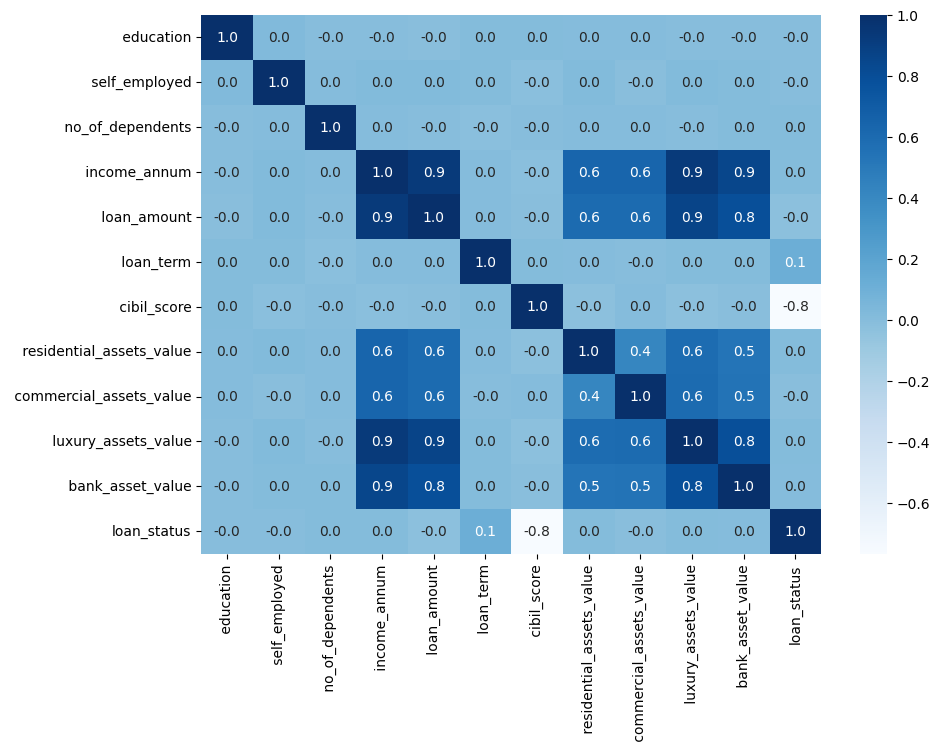

In [50]:
plt.figure(figsize= (10, 7))
sns.heatmap(pd.concat([X_ppcd, y_train_num], axis=1).corr(),
            annot=True,
            fmt='.1f',
            cmap='Blues');

<div dir="rtl">לפי המקרא בצד ימין ניתן לראות כי ככל שצבע הריבוע כהה יותר כך יש קורלציה יותר חזקה. ניתן לראות כי יש קורלציה חזקה בין luxury_assets_value ובין income_annum עובדה זו לא מפתיע ואף הגיונית, מכיוון שככל שיש לך הכנסה שנתית יותר גבוהה כך אתה יכול לקנות ולהחזיק יותר נכסי מותרות.
<br>
בנוסף יש קורלציה חזקה בין luxury_assets_value לבין loan_ammount, כפי שהראיתי קודם ככל שיש יותר נכסי מותרות אתה יותר עשיר,אני מסיק כי אנשים עשירים ירצו להגדיל את הונם על ידי רכישה של נכסים או השקעה בדברים נוספים, ניתן לקחת הלוואה יותר גדולה ככל שאתה יותר עשיר כלומר אנשים עשירים עם נכסי מותרות ירצו לקבל הלוואות בסכומים גדולים על מנת להגדיל את הונם ואת נכסיהם.
<br>
יש קורלציה חזקה גם בין bank_assets_value ובין  income_annum זה הגיוני ואף נדרש. מכיוון שככל שההכנסה השנתית עולה כך מופרש יותר כסף לפנסיה וחסכונות נוספים שמתווספים לשווי נכסי הבנק. ישנה גם קורלציה חזקה בין bank_assets_value ובין loan_ammount אני מאמין כי עובדה זו נובעת מהרצון להגדיל את ההון.
<br>
ישנה קורלציה שלילית בין cibil_score ובין loan_status עמודת המטרה, אני מניח שעובדה זו נובעת מהאופי המספרי של שתי העמודות מכיוון שבאחד הגרפים הקודמים הראיתי כי יש ממש קו שחוצה את ערכי ה-cibil_score בנוגע לאישור ההלוואה או לא.
<br>
אני מופתע כי אין קורלציה חזקה בין self_employed או education לבין loan_status, הנחתי כי אם הבנק צריך את הנתון הזה יש לו משמעות בנוגע לאישור ההלוואה.</div>

#למידת מכונה

## הכנת העצמים


In [51]:
placeholder_classifier = KNN()
#יצירת עצם האלגוריתם

In [52]:
clf_steps = [('preprocessor', preprocessor),
             ('classification', placeholder_classifier)]

In [53]:
clf = Pipeline(steps=clf_steps)
clf

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('impute',
                                  ColumnTransformer(force_int_remainder_cols=False,
                                                    n_jobs=-1,
                                                    remainder='passthrough',
                                                    transformers=[('numerical',
                                                                   SimpleImputer(strategy='median'),
                                                                   [' '
                                                                    'no_of_dependents',
                                                                    ' '
                                                                    'income_annum',
                                                                    ' '
                                                                    'loan_amount',
                                                                    ' '
                                                                    'loan_term',
                                                                    ' '
                                                                    'cibil_score',
                                                                    ' '
                                                                    'residential_assets_value',
                                                                    ' '
                                                                    'commercial_assets_value',
                                                                    ' '
                                                                    'luxu...
                                 ('cat_to_num',
                                  ColumnTransformer(force_int_remainder_cols=False,
                                                    n_jobs=-1,
                                                    remainder='passthrough',
                                                    transformers=[('bin',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=2),
                                                                   [' '
                                                                    'education',
                                                                    ' '
                                                                    'self_employed'])],
                                                    verbose_feature_names_out=False)),
                                 ('outliers', Winsorizer()),
                                 ('stantdarize', MinMaxScaler())])),
                ('classification', KNeighborsClassifier())])

<div dir="rtl">בשורה הבאה, אצור פונקציה שלמעשה תהיה פונקצית הזהות עבור עמודות נומריות. יצרתי פונקציה זו על מנת לבדוק את האפשרות שלא לטפל בחריגים בשלב העיבוד המקדים, כלומר האם החריגים הם למעשה ערכי האמת.</div>

In [54]:
params = [
    {
        'preprocessor__outliers': [helpers.identity_transformer, Winsorizer()],
        'preprocessor__stantdarize': [MinMaxScaler(), MaxAbsScaler(), StandardScaler()],
        'classification': [KNN()],
        'classification__n_neighbors': [5, 15, 100]
    },
    {
        'preprocessor__outliers': [helpers.identity_transformer, Winsorizer()],
        'preprocessor__stantdarize': [MinMaxScaler(), MaxAbsScaler(), StandardScaler()],
        'classification': [SVC(random_state=42)],
        'classification__C': [1, 10, 100],
        'classification__kernel': ['linear', 'poly', 'rbf', 'sigmoid']
    }
]

## אימון וחיזוי

### gs1

In [55]:
# Even though the 'pos_label' parameter is ignored by the scorer
# when the 'average' parameter is not 'binary',
# the scorer still fails for some reason when the 'pos_label'
# parameter is left at its default value of 1.
# It doesn't fail, but issues a warning, when 'pos_label' is set
# to one of the possible values in the target column.
# Setting this parameter equal to None pacifies the scorer.
scorer = make_scorer(f1_score, average= 'macro', pos_label= None)

In [56]:
gs = GridSearchCV(estimator = clf,
                  param_grid = params,
                  scoring = scorer,
                  n_jobs=-1,
                  verbose= 10,
                  error_score= 'raise')

In [57]:
gs = helpers.fit(gs, X_train, y_train)

original fit duration: 00:39:32


In [58]:
gs.best_params_

{'classification': SVC(random_state=42),
 'classification__C': 100,
 'classification__kernel': 'poly',
 'preprocessor__outliers': FunctionTransformer(feature_names_out='one-to-one',
                     func=<function <lambda> at 0x00000200037C4F40>),
 'preprocessor__stantdarize': MinMaxScaler()}

In [59]:
gs.best_score_

np.float64(0.9378673466042098)

<div dir="rtl">כעת אחרי שהגעתי לערך היפר פרמטר הכי טוב עבור SVC אמשיך איתו ואשנה את שאר הערכים.</div>

### gs2

In [60]:
params2 = [
    {
        'preprocessor__outliers': [helpers.identity_transformer, Winsorizer()],
        'preprocessor__stantdarize': [MinMaxScaler(), MaxAbsScaler(), StandardScaler()],
        'classification': [KNN()],
        'classification__n_neighbors': [5, 10, 15]
    },
    {
        'preprocessor__outliers': [helpers.identity_transformer, Winsorizer()],
        'preprocessor__stantdarize': [MinMaxScaler(), MaxAbsScaler(), StandardScaler()],
        'classification': [SVC(random_state=42)],
        'classification__C': [6, 10, 15],
        'classification__kernel': ['linear', 'poly', 'rbf', 'sigmoid']
    }
]

In [61]:
gs2 = GridSearchCV(estimator = clf,
                  param_grid = params2,
                  scoring = scorer,
                  n_jobs=-1,
                  verbose= 10,
                  error_score= 'raise')

In [62]:
gs2 = helpers.fit(gs2, X_train, y_train, '2')

original fit duration: 00:41:34


<div dir="rtl">ניתן לראות כי זמן הריצה עבור ה-gridsearchCV קצר יותר מאשר ה-gs הראשון אך עדיין ארוך.</div>

In [63]:
gs2.best_score_

np.float64(0.9393670933319853)

In [64]:
gs2.best_params_

{'classification': SVC(random_state=42),
 'classification__C': 6,
 'classification__kernel': 'rbf',
 'preprocessor__outliers': FunctionTransformer(feature_names_out='one-to-one',
                     func=<function <lambda> at 0x00000200052184A0>),
 'preprocessor__stantdarize': MinMaxScaler()}

<div dir="rtl">כעת אחרי שהגעתי לאלגוריתם עם הציון הגבוה ביותר, אסתפק בו. </div>

## חיזוי

In [65]:
y_pred = helpers.predict(gs2, X_test)
#חזיית עמודת המטרה

original predict duration: 00:00:01


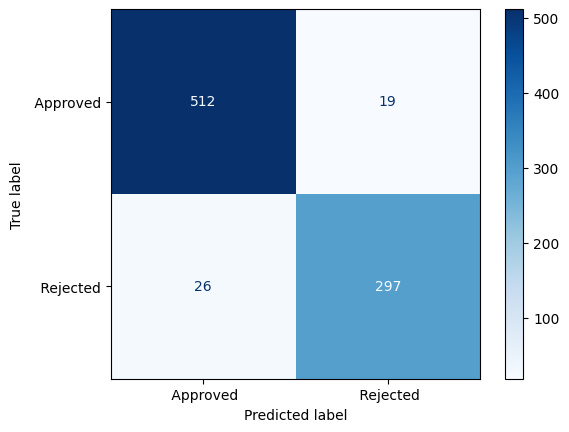

In [66]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')

In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Approved       0.95      0.96      0.96       531
    Rejected       0.94      0.92      0.93       323

    accuracy                           0.95       854
   macro avg       0.95      0.94      0.94       854
weighted avg       0.95      0.95      0.95       854



## <span dir="rtl">מסקנות</span>

<div dir="rtl">מסקנותי יתייחסו בנוגע למטריצת הבלבול ודוח הסיווג. תחילה אתייחס לדוח הסיווג, ניתן לראות כי החיזוי היה גבוה למדי. accuracy של 0.96 אומר שכ-96% מהתחזיות היו נכונות.
ניכר הבדל בין ה-precision עבור כל אחד מהתגים עם יתרון עבור ה-approved. כלומר מכיוון שעמודת המטרה אינה מאוזנת באופן מירבי, היו יותר דגימות של approved ולכן המודל מכיר יותר טוב את approved.
 ערכי ה-recall עבור התגים דומים למדי. למרות שהמדדים טובים מאד ודומים עבור שני התגים, על סמך המדד precision אסיק כי המודל אומן ומכיר יותר טוב את התג approved.
 <br>
 עבור מטריצת הבלבול, ניתן לראות כי הרוב המוחלט עבור שני התגים נחזה בצורה נכונה. מספר הדוגמאות שנחזו בצורה שגויה דומה עבור שני התגים, וככל הנראה המקרים בהם דוגמאות של rejected שנחזו כ-approved נובעים מחוסר בעמודת המטרה. לסיכום, יש תוצאות טובות מאד עבור החיזוי, וניתן לראות זו באופן ברור במטריצת הבלבול על ידי אלכסון משמאל לימין כהה, ומימין לשמאל בהיר. יש דוגמאות שנחזו בצורה שגויה אבל מספר מועט ביחס לגודל ה-test.</div>

## overfitting

In [68]:
ax, best_params = helpers.plot_train_test_scores(gs2, clf, scorer, X_train, X_test, y_train, y_test)

original plot duration: 00:04:37


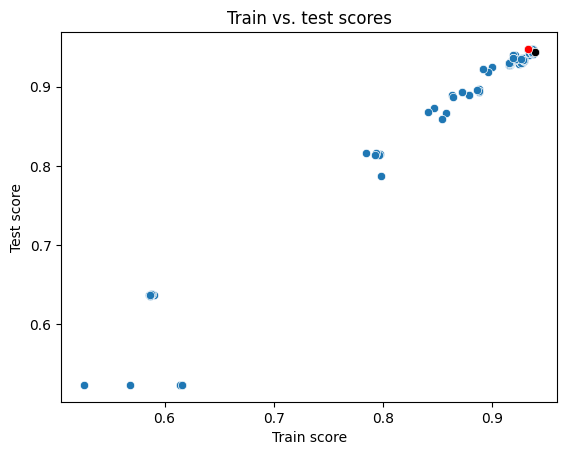

In [69]:
helpers.show_plot(ax);

In [70]:
best_params['test']

{'classification': SVC(C=15, kernel='sigmoid', random_state=42),
 'classification__C': 6,
 'classification__kernel': 'poly',
 'preprocessor__outliers': FunctionTransformer(feature_names_out='one-to-one',
                     func=<function <lambda> at 0x0000020004F6FC40>),
 'preprocessor__stantdarize': MinMaxScaler()}

In [71]:
best_params['train']

{'classification': SVC(C=15, kernel='sigmoid', random_state=42),
 'classification__C': 6,
 'classification__kernel': 'rbf',
 'preprocessor__outliers': FunctionTransformer(feature_names_out='one-to-one',
                     func=<function <lambda> at 0x0000020004F6FC40>),
 'preprocessor__stantdarize': MinMaxScaler()}

<div dir="rtl">אכתוב כעת את מסקנותי בנוגע לגרף Train vs. test scores. בגרף זה כל נקודה מבטאת אלגוריתם וערכי היפר פרמטר, קורדינטאת הנקודה היא ציון החיזוי עבור ה-test ועבור ה-train. על ידי גרף זה ניתן לראות את הפתרון הכי טוב עבור ה-train ועבור ה-test בתקווה שהם אותו אחד. ניתן לראות מהגרף כי זה הוא לא המקרה וכי הפתרון שנבחר עבור החיזוי הוא לא הפתרון הטוב יותר עבור ה-test אלא עבור ה-train. בעיה זו נובעת מ-overfitting כלומר המודל שנבחר לא הצליח להכליל את נתוני ה-test בצורה הכי טובה ולמצוא את החוקיות האמיתית, אלא הוא הכליל את נתוני ה-train. הנקודה האדומה בגרף מסמלת את הפתרון הטוב ביותר עבור ה-test ואילו השחורה עבור ה-train. ניתן לראות כי הם חופפות וכי ציונן עבור ה-test קרוב. יתכן שבמידה והייתי מריץ עוד ערכי היפר פרמטר הייתי מצליח להוריד את ה-overfitting. מכיוון שטבלת ה-test אצל מנהל התחרות כלומר אין לי גישה עליה, אני לא יודע איך יכלתי למנוע את בעית ה-overfitting.</div>

#סיכום

## מסקנות בנוגע לנתונים

<div dir="rtl">בחרתי בטבלה בנושא הלוואות, לא הנושא שהכי עניין אותי אבל האמנתי שאמצא תחומים בתוכו שאוכל להתעניין בהם. צדקתי, אני מאמין כי מתוך הכרה מוקדמת ועניין בחלק מן התחומים יכלתי לזהות מגמות מראש וזה עזר לי בנוגע לפרויקט. ציפיתי שאמצא יותר קשרים למשל בין דירוג האשראי לבין הכנסה ממוצעת, או מספר האנשים שתלויים ואישור ההלוואה אך לא מצאתי. לעומת זאת מצאתי קשר חזק מאד בין הכנסה שנתית לנכסי מותרות, לא מפתיע אך לא ציפיתי שיהיה חזק כל כך.
<br>
מתחילת הפרויקט ניסיתי להמעיט במחיקת שורות או ערכים חריגים, ואני חושב שזה חלק ממה שעזר לציון גבוה עבור האלגוריתם המסווג. הטבלה קלה לעבודה, וכפי שכתבתי קודם יש סיכוי שהערכים בה מומצאים, לא היו ערכים חסרים או חריגים שגרעו מתפקוד האלגוריתם לכן עובדה זו תורמת למחשבה כי הטבלה מומצאת ולכן הציון כה גבוה. <br>אני לא יודע האם היו עוד צעדים שיכלתי לנקוט על מנת לשפר את ציון האלגוריתם, אולי לבדוק עוד שלבים ועוד ערכים עבור ערכי ההיפר פרמטר. לסיכום אני מרוצה מאד מערכי האלגוריתם והייתי שמח לדעת האם יש עוד לשבים שיכלתי לנקוט על מנת לשפר את הציון.
</div>

## רפקלציה אישית

<div dir="rtl">פחדתי מאד לפני ביצוע הפרויקט, מכיוון שהחומר לא כל וכלל הרבה סעיפים והחלטות לאורך הפרויקט. העבודה עם המצגות, עם החברים ובעיקר עם איתי עזרה לי מאד וגרמה לי להבין הרבה יותר את החומר בצורה מעשית. הפרויקט עוזר להבנת החומר ולשיפור יכולת החשיבה, הוא לא קל אך אפשרי ומספק מאד בסופו.
<br> אני גאה מאד בעצמי על כך שהצלחתי לסיים את הפרויקט למרות כל הקשיים וחוסר ההבנה בדרך. בתחילת השנה שבחרתי את המגמה היה לי ברור שלא יהיה לי קל אבל בחרתי עם הרבה עניין. צדקתי כי גיליתי לכל אורך הקורס עניין וחקרתי אחר תחומים אחרים עם הידע שצברתי במהלך הקורס.</div>